[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 

<ipython-input-2-be24160df23a>:129: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_result.show()


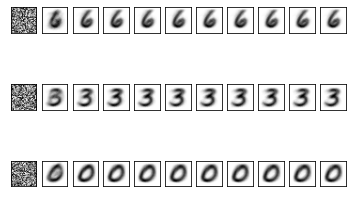

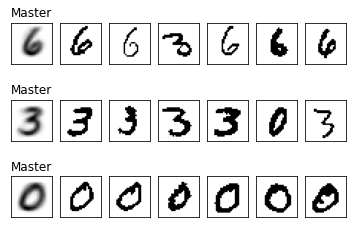

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request

# [트레이닝 셋 불러오기]
# 0,3,6 데이터 200개씩
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/jaehosung/ml4se_codes/main/exercise07/sample-images_01.txt", "images.txt"
)

# 트레이닝 셋 할당, 이미지 1개 28픽셀x28픽셀
df_training_set = pd.read_csv('images.txt', sep=",", header=None) # 트레이닝 셋 (size=(600,784))
print(df_training_set.iloc[0].values.reshape(28,28))

# 베르누이 확률 분포
def bernoulli(x, mu): # x (size = (784,)), mu (size = (784,))
    p = np.prod(mu[x == 1]) * np.prod(1 - mu[x == 0])
    return p

# 생성기 시각화
def draw_generator(axs_generators, iter_num, mu):
    for k in range(K):
        axs_generators[k, iter_num].set_xticks([])
        axs_generators[k, iter_num].set_yticks([])
        axs_generators[k, iter_num].imshow(mu[k].reshape(28, 28), cmap=plt.cm.gray_r)

# 파라미터 설정
N = len(df_training_set) # 데이터 개수 (600)
K = 3 # 생성기 개수
iteration_num = 4# 생성기 생성 반복 횟수

# 분류 결과의 시각화 함수
def draw_result(mu, r_argmax, axs):
    for c in range(K):
        # 이미지 생성기 시각화
        axs[c,0].set_xticks([])
        axs[c,0].set_yticks([])
        axs[c,0].set_title('Master')
        axs[c,0].imshow(mu[c].reshape(28, 28), cmap=plt.cm.gray_r)

        # K번째 이미지 생성기에 속하는 데이터
        i = 1
        for j in range(len(r_argmax)):
            if r_argmax[j] == c:
                axs[c,i].set_xticks([])
                axs[c,i].set_yticks([])
                axs[c,i].imshow(df_training_set.iloc[j].values.reshape(28, 28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break


# E(expectation) step
# 각 이미지가 k 이미지 생성기를 통해서 얻어질 가능성 계산
def calc_expectation(df_training_set, pi, mu):
    r_n_k = np.empty(shape=(0, K))  # r_n_k: 데이터가 k번째 이미지 생성기로부터 이미지가 얻어질 가능성

    # r_n_k 계산하기
    for _, x_n in df_training_set.iterrows():  # N개의 데이터에 대해서 차례대로 계산, x_n (size=(784,))

        r_i_k = np.array([])

        for k in range(K):  # K개의 이미지 생성기에 대해서 차례대로 계산
            p_mu_k = bernoulli(x_n, mu[k])  # p_u_k : p_u_k(x_n)

            # r_i_k_numer 계산
            r_i_k_numer = pi[k] * p_mu_k  # r_i_k_numer(numerator): pi * p_mu_k(x_n)

            # r_i_k_denom 계산
            r_i_k_denom = 0.0  # r_i_k_denom(denominator): sigma(pi * P_mu_k)
            for kk in range(K):
                r_i_k_denom += pi[kk] * bernoulli(x_n, mu[kk])

                # r_i_k = r_i_k_numer / r_i_k_denom
            r_i_k = np.hstack((r_i_k, r_i_k_numer / r_i_k_denom))
        r_n_k = np.vstack((r_n_k, r_i_k))  # r_n_k (size=(N,K))

    return r_n_k


# M(maximization) step
# 새로운 이미지 생성기 mu와 이미지 생성기를 선택할 확률 pi 계산
def calc_new_generators(df_training_set, r_n_k, pi, K):
    mu_numer = np.zeros(28 * 28 * K).reshape(K, 28 * 28)  # mu_numer(numerator) (size = (K, 284))
    for k in range(K):  # K개의 이미지 생성기에 대해서 차례대로 계산
        mu_denom = r_n_k[:, k].sum()  # mu_denom = sigma_n(r_n_k) (dtype: float)
        pi[k] = mu_denom / N  # pi_k = sigma(n_k) / N
        for i, x_n in df_training_set.iterrows():  # N개의 데이터에 대해서 차례대로 계산
            mu_numer[k] += x_n * r_n_k[i][k]  # mu_k 분모: sigma_n(r_n_k * x_n)
        mu[k] = mu_numer[k] / mu_denom  # mu_k = sigma_n(r_n_k * x_n) / sigma(r_n_k)

    return mu, pi


# EM 알고리즘을 사용하여 이미지 생성기 만들기

# 변수 초기화
pi = np.full(K, 1 / K)  # pi: K번째 이미지 생성기를 선택할 확률 (size=(K,))
# mu: K개의 이미지 생성기 (size=(K,784))
mu = (np.random.rand(28 * 28 * K) * 0.5 + 0.25).reshape(K, 28 * 28)
# r_n_k: n번째 이미지가 k번째 이미지 생성기로부터 이미지가 얻어질 가능성, r_n_k_final: 계산 반복을 끝냈을 때 r_n_k 값
r_n_k_final = np.array([])

# 생성기의 변화 시각화
fig_generators, axs_generators = plt.subplots(K, iteration_num + 1)  # axs_generators (size=(K, iteration_num+1))

# 이미지 생성기 초기값 시각화
draw_generator(axs_generators, 0, mu)

for iter_num in range(iteration_num):
    print("iter_num %d" % iter_num)

    # 각 이미지가 k 이미지 생성기를 통해서 얻어질 가능성 계산
    r_n_k = calc_expectation(df_training_set, pi, mu)
    # 새로운 이미지 생성기 mu와 이미지 생성기를 선택할 확률 pi 계산
    mu, pi = calc_new_generators(df_training_set, r_n_k, pi, K)

    # 이미지 생성기 시각화
    draw_generator(axs_generators, iter_num + 1, mu)

    # 계산 반복을 끝냈을 때 r_n_k 값 저장
    r_n_k_final = r_n_k.copy()

# 분류 결과 표시
fig_result, axs_result = plt.subplots(K, 7)
r_argmax = list(r_n_k_final.argmax(axis=1))  # 가장 높은 확률로 소속될 생성기의 인덱스
draw_result(mu, r_argmax, axs_result)
fig_result.show()

In [3]:
r_n_k
r_argmax = list(r_n_k_final.argmax(axis=1))

In [4]:
# 각각의 생성기에서 높은 확률로 분류된 리스트 생성하기
# 앞에 6개 시각화 하기

In [5]:
df_r_n_k = pd.DataFrame(r_n_k)
r_n_0 = df_r_n_k.sort_values(0,axis = 0,ascending = False)[0].copy()
r_n_1 = df_r_n_k.sort_values(1,axis = 0,ascending = False)[1].copy()
r_n_2 = df_r_n_k.sort_values(2,axis = 0,ascending = False)[2].copy()

<ipython-input-33-d906c10a3135>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_result.show()


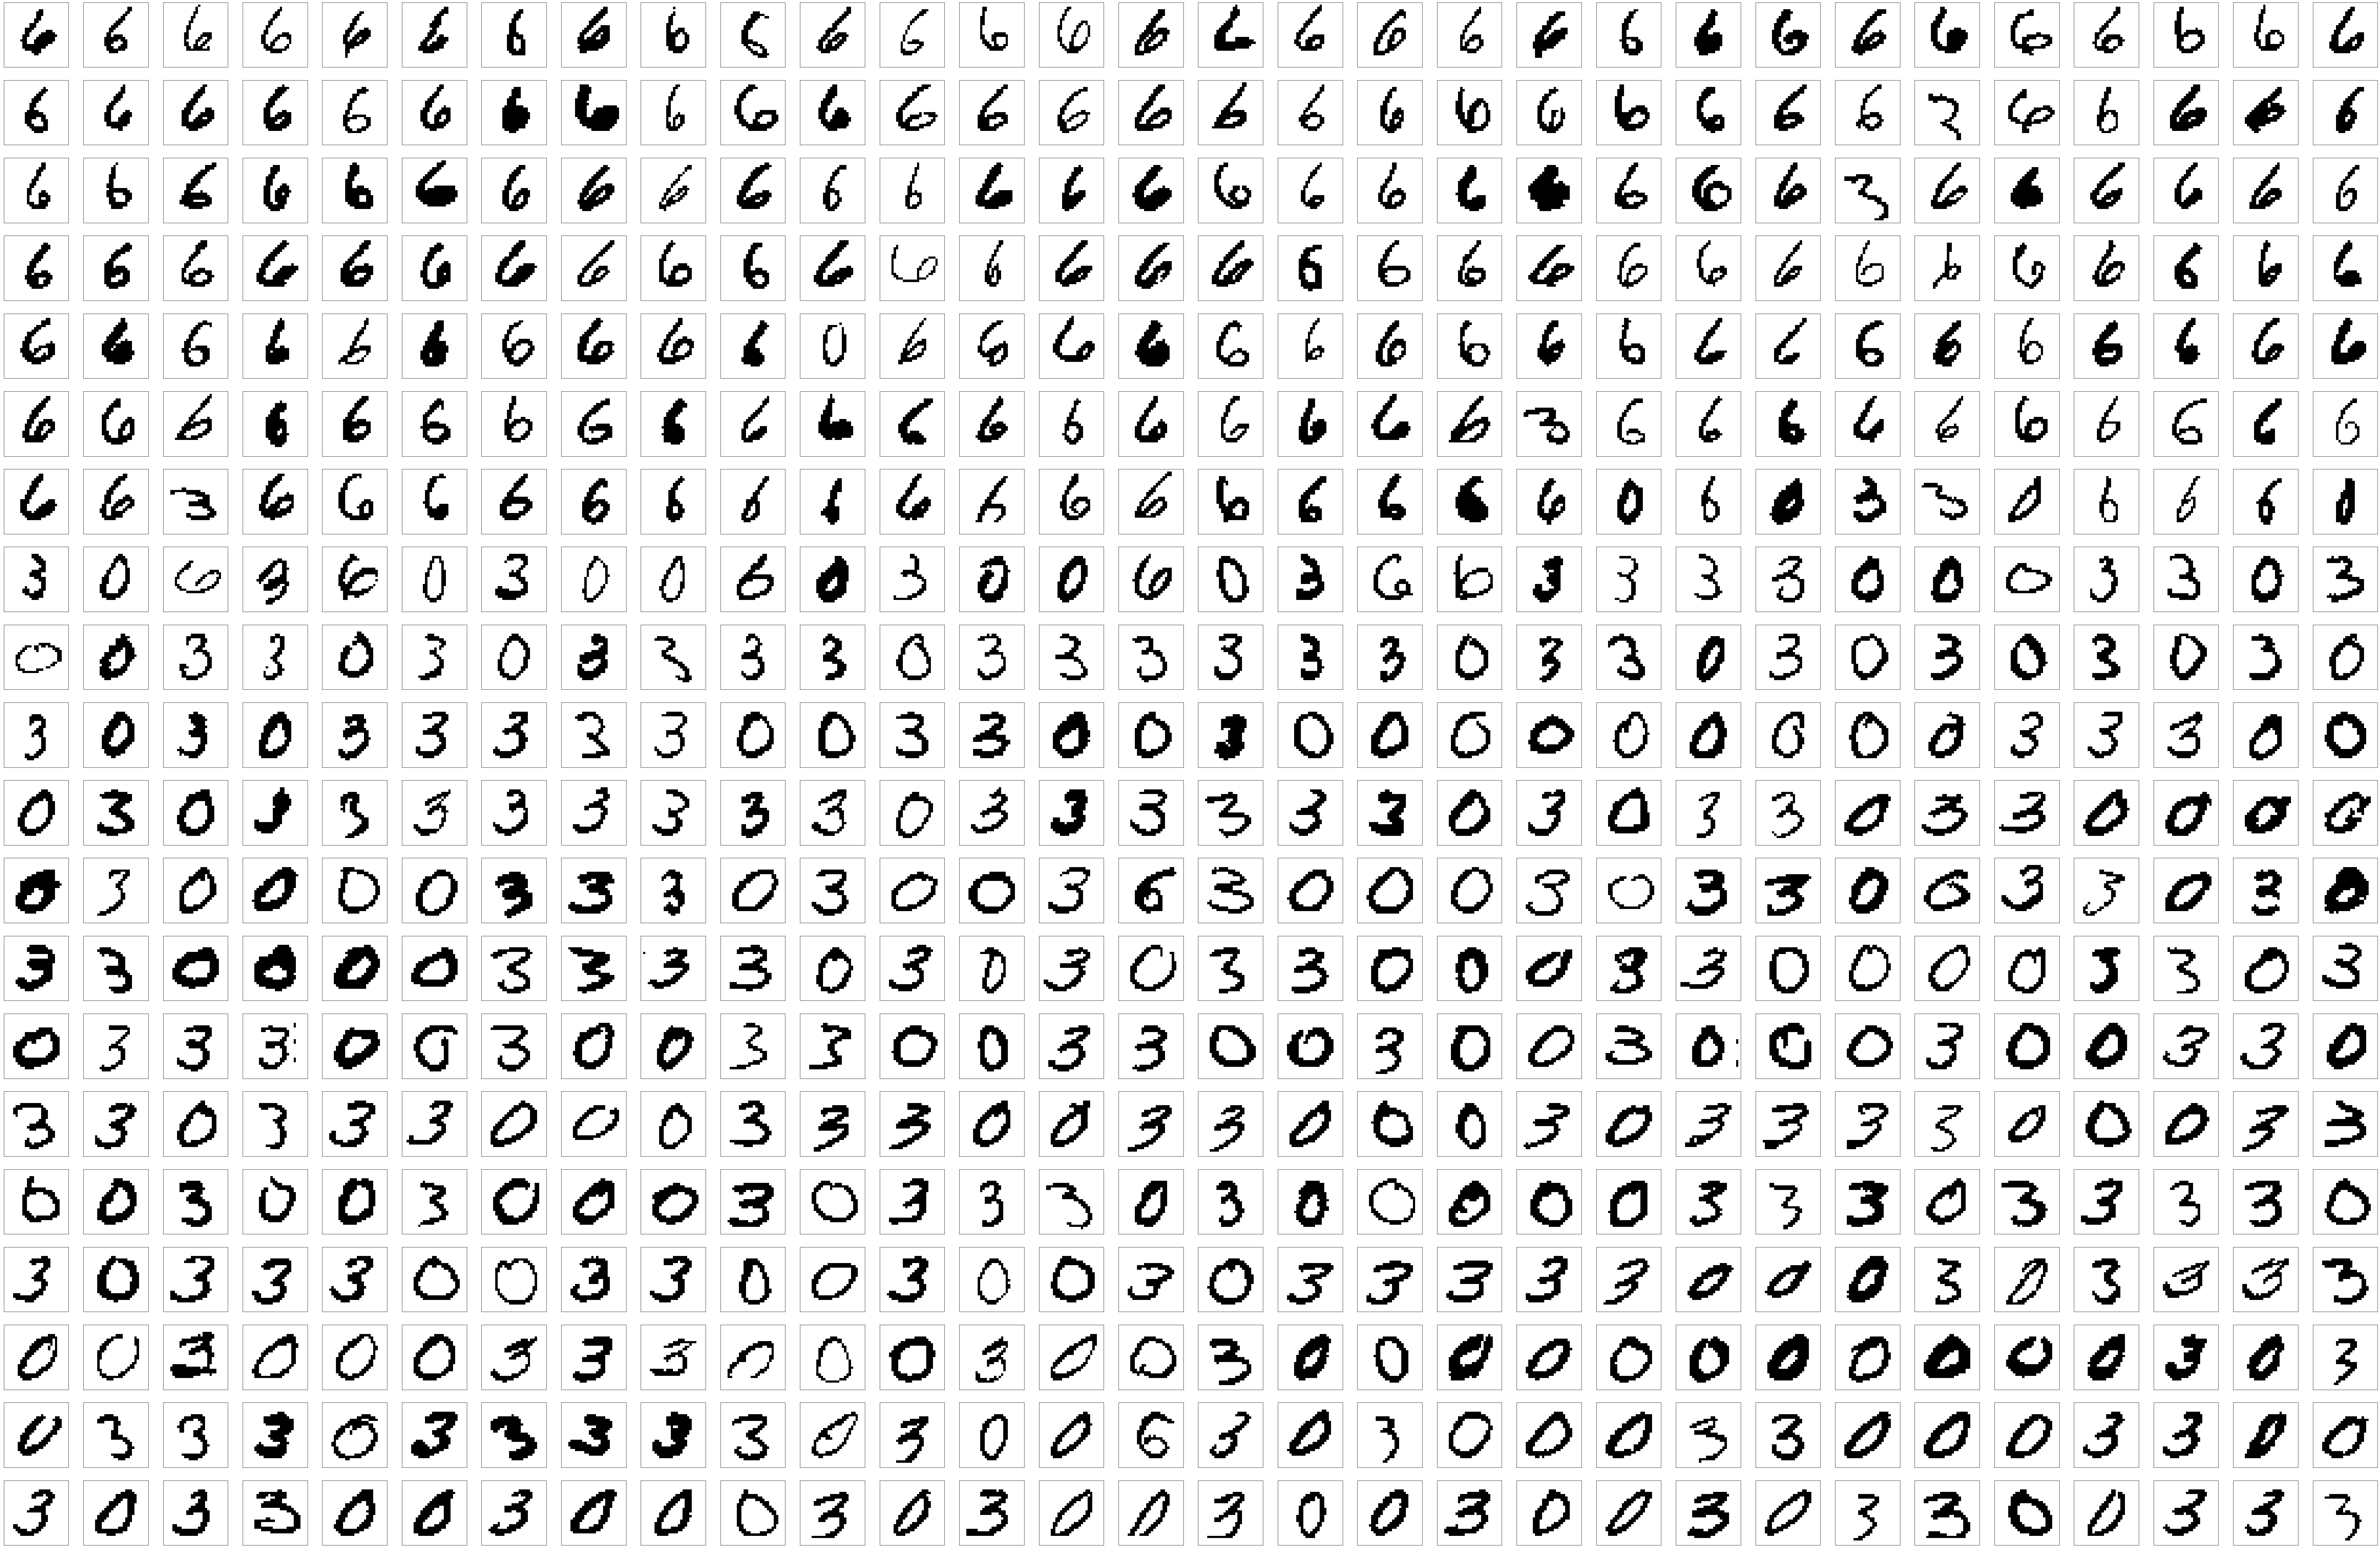

In [33]:
col_max = 30
row_max = 20

fig_result, axs_result = plt.subplots(row_max, col_max,figsize = (col_max*4,row_max*4))
i = 0
for idx,line in r_n_0.items():
    if i < col_max * row_max:
        row = int(i/col_max)
        col = i%col_max
        axs_result[row][col].set_xticks([])
        axs_result[row][col].set_yticks([])
        axs_result[row][col].imshow(df_training_set.iloc[idx].values.reshape(28, 28), cmap=plt.cm.gray_r)
        i = i+1
fig_result.show()

In [35]:
# TODO argmax가 그 숫자인 것들만 모아서 시각화 하기